In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from os import path
from pandas_profiling import ProfileReport


In [3]:
root_path ='./data/train_preliminary/'
ad_path = os.path.join(root_path,'ad.csv')
click_path = os.path.join(root_path,'click_log.csv')
user_path = os.path.join(root_path,'user.csv')

In [3]:
df_user = pd.read_csv(user_path)

In [10]:
df_user.head(1)

,user_id,age,gender
0,1,4,1


In [17]:
#User list
df_user.shape

(900000, 3)

# 年龄分布

<BarContainer object of 10 artists>

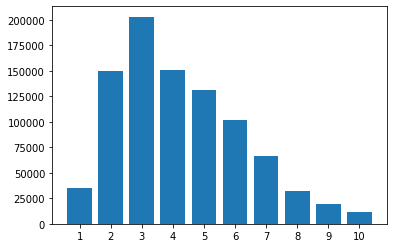

In [51]:
age_dis = df_user.groupby(['age'])['user_id'].count().reset_index()
plt.bar(age_dis['age'],age_dis['user_id'],tick_label=age_dis['age'])

In [47]:
age_dis

,age,user_id
0,1,35195
1,2,149271
2,3,202909
3,4,150578
4,5,130667
5,6,101720
6,7,66711
7,8,31967
8,9,19474
9,10,11508


# 性别分布

<BarContainer object of 2 artists>

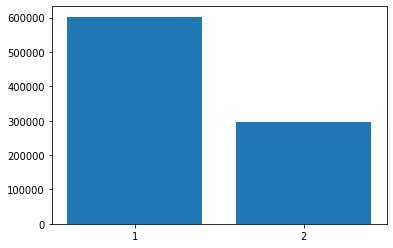

In [50]:
gender_dis = df_user.groupby(['gender'])['user_id'].count().reset_index()
plt.bar(gender_dis['gender'],gender_dis['user_id'],tick_label=gender_dis['gender'])

In [49]:
gender_dis 

,gender,user_id
0,1,602610
1,2,297390


# 广告的分布

In [4]:
df_ad = pd.read_csv(ad_path,na_values='\\N')

In [5]:
df_ad

,creative_id,ad_id,product_id,product_category,advertiser_id,industry
0,1,1,NaN,5,381,78.0
1,4,4,NaN,5,108,202.0
2,7,7,NaN,5,148,297.0
3,8,8,NaN,5,713,213.0
4,9,9,NaN,5,695,213.0
...,...,...,...,...,...,...
2481130,4445714,3812196,9152.0,3,56976,248.0
2481131,4445715,3812197,39063.0,17,427,NaN
2481132,4445716,3812198,39063.0,17,427,NaN
2481133,4445717,3812199,35885.0,17,427,NaN


In [7]:
df_ad.product_id.nunique()#33272

33272

In [9]:
df_ad.advertiser_id.nunique()#33272

52090

In [11]:
df_ad.ad_id.nunique()

2264190

In [47]:
ad_profile = ProfileReport(df_ad,  html={'style':{'full_width':True}},progress_bar=True,minimal=True)

In [48]:
ad_profile.to_widgets()

# 点击分布

In [3]:
df_click = pd.read_csv(click_path,na_values='\\N')

In [4]:
df_click

,time,user_id,creative_id,click_times
0,9,30920,567330,1
1,65,30920,3072255,1
2,56,30920,2361327,1
3,6,309204,325532,1
4,59,309204,2746730,1
...,...,...,...,...
30082766,6,30920,228129,1
30082767,57,30920,2361397,1
30082768,26,30920,629802,1
30082769,86,30920,2713031,1


In [8]:
df = df_click['click_times'].value_counts().rename_axis('click_time').reset_index(name='counts')


In [13]:
df_click['click_times'].value_counts()

1      28426543
2       1507449
3         90356
4         43047
5          7507
6          3512
7          1529
8          1486
9           452
10          270
11          172
12          116
13           76
14           62
15           36
16           34
17           22
18           21
21           17
20           13
19           10
22            5
23            4
26            3
32            3
27            3
30            3
24            3
25            2
29            2
33            2
37            2
28            1
67            1
34            1
35            1
36            1
43            1
44            1
50            1
152           1
Name: click_times, dtype: int64

In [14]:

df_click['click_times'].value_counts()

1      28426543
2       1507449
3         90356
4         43047
5          7507
6          3512
7          1529
8          1486
9           452
10          270
11          172
12          116
13           76
14           62
15           36
16           34
17           22
18           21
21           17
20           13
19           10
22            5
23            4
26            3
32            3
27            3
30            3
24            3
25            2
29            2
33            2
37            2
28            1
67            1
34            1
35            1
36            1
43            1
44            1
50            1
152           1
Name: click_times, dtype: int64

In [8]:
click_profile = ProfileReport(df_click,  html={'style':{'full_width':True}},progress_bar=True,minimal=True)

In [9]:
click_profile.to_widgets()

In [16]:
user_click_count = df_click.groupby('user_id').creative_id.nunique().reset_index()

In [85]:
#user_click_count.groupby('creative_id')['click_time'].sum()

11030

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1285c2198>]],
      dtype=object)

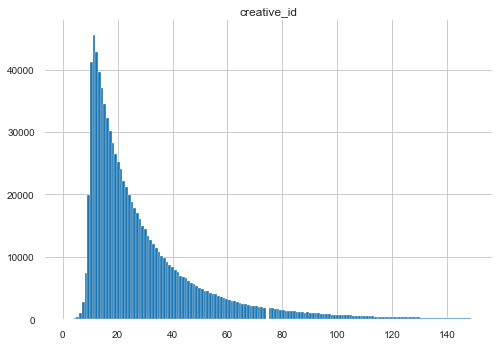

In [110]:
temp = user_click_count[user_click_count['creative_id']<150]
temp.hist(column ='creative_id', bins=150)

In [72]:
user_click_count.creative_id.median()

22.0

In [ ]:
# 去掉点击超过150 个各种广告的。 有6626个用户 

In [18]:
click_too_many_ad = user_click_count[user_click_count['creative_id']>150]['user_id']

In [ ]:
# 去掉每天点击太多的。10次以上的.。防止是刷流量的。 有620个用户

In [27]:
click_too_many_times = df_click[df_click['click_times']>10]['user_id'] 

47872         3118
151926      317559
168405      318448
272306      324159
273472       32422
             ...  
29839646    295799
29845612    296134
29919801    300190
29931978    300867
29999410    304506
Name: user_id, Length: 620, dtype: int64

# 点击分布 - 热门广告

In [30]:
temp = df_click.groupby('creative_id').user_id.nunique().reset_index()

In [42]:
temp.sort_values(by='user_id',ascending=False).head(10)

,creative_id,user_id
71966,108133,51267
188650,304118,51202
24498,37298,46568
1045927,1837000,43506
21307,32571,39628
1331201,2353377,36197
36208,54150,32835
1014208,1779084,31604
31512,47512,27404
1181756,2085566,27179


In [44]:
#广告素材 被点击的中位数为 2. 平均为11
temp['user_id'].median()

2.0

In [60]:
click_users_temp = temp.sort_values(by='user_id',ascending=False)

In [65]:
click_users_temp.shape

(2481135, 2)

In [69]:
click_users_temp[click_users_temp['user_id']>100]['user_id'].sum()

15311964

In [70]:
click_users_temp[click_users_temp['user_id']>100].shape

(33512, 2)

In [67]:
click_users_temp['user_id'].sum()

27608868

In [50]:
ad_click_user = df_click.groupby('creative_id').user_id.count().reset_index()

In [54]:
ad_click_user['user_id'].mean()

12.124600636402292

# 年龄段性别分布

In [5]:
df_user.groupby(['age','gender']).sum()

user_id
age gender             
1   1       10272173041
    2        5550973558
2   1       44120031068
    2       22990208918
3   1       60616463098
    2       30814017998
4   1       46718501774
    2       20951578433
5   1       40774664059
    2       18039314568
6   1       31294970487
    2       14427599703
7   1       19731323734
    2       10326276446
8   1        9087762440
    2        5305151588
9   1        5405712537
    2        3374695919
10  1        3165557633
    2        2033472998

# 缺失值分析

In [13]:
train_root_path ='./data/train_preliminary/'
train_ad_path = os.path.join(train_root_path,'ad.csv')
train_click_path = os.path.join(train_root_path,'click_log.csv')
train_user_path = os.path.join(train_root_path,'user.csv')

In [14]:
test_root_path = './data/test/'
test_ad_path = os.path.join(test_root_path,'ad.csv')
test_click_path = os.path.join(test_root_path,'click_log.csv')

In [15]:
df_click_train = pd.read_csv(train_click_path,dtype= {'creative_id':str,'click_times':str,'time':str})
df_click_test = pd.read_csv(test_click_path,dtype= {'creative_id':str,'click_times':str,'time':str})

In [16]:
df_ad_train = pd.read_csv(train_ad_path,na_values='\\N', 
                          dtype= {'creative_id':str,'ad_id': str, 'product_id': str, 'product_category': str,'advertiser_id': str,'industry': str} )
df_ad_test = pd.read_csv(test_ad_path,na_values='\\N',
                         dtype= {'creative_id':str,'ad_id': str, 'product_id': str, 'product_category': str,'advertiser_id': str,'industry': str} )

In [17]:
df_click_ad_train = df_click_train.merge(df_ad_train,on=['creative_id'],how='inner')
df_click_ad_test = df_click_test.merge(df_ad_test,on=['creative_id'],how='inner')

In [18]:
df_click_all =  pd.concat([df_click_ad_train,df_click_ad_test], axis=0)


In [19]:
df_click_all = df_click_all.sort_values('time', ascending=True)

In [ ]:
from pandas_profiling import ProfileReport
ad_profile = ProfileReport(df_click_all,  html={'style':{'full_width':True}},progress_bar=True,minimal=True)